In [ ]:
import torch

from mmcv import Config
from mmcv.runner import load_checkpoint
from mmseg.models import build_segmentor

# Explore Prithvi Crop Segmentation Model

This notebook is to explore the crop segmentation model implemented by Jakubik et. al, based on Prithvi.

In [3]:
cfg = Config.fromfile('./multi_temporal_crop_classification_Prithvi_100M.py')
checkpoint_path = './multi_temporal_crop_classification_Prithvi_100M.pt'

# Build the model
model = build_segmentor(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))

load from ./prithvi/Prithvi_100M.pt
load checkpoint from local path: ./prithvi/Prithvi_100M.pt
The model and loaded state dict do not match exactly

unexpected key in source state_dict: mask_token, decoder_pos_embed, decoder_embed.weight, decoder_embed.bias, decoder_blocks.0.norm1.weight, decoder_blocks.0.norm1.bias, decoder_blocks.0.attn.qkv.weight, decoder_blocks.0.attn.qkv.bias, decoder_blocks.0.attn.proj.weight, decoder_blocks.0.attn.proj.bias, decoder_blocks.0.norm2.weight, decoder_blocks.0.norm2.bias, decoder_blocks.0.mlp.fc1.weight, decoder_blocks.0.mlp.fc1.bias, decoder_blocks.0.mlp.fc2.weight, decoder_blocks.0.mlp.fc2.bias, decoder_blocks.1.norm1.weight, decoder_blocks.1.norm1.bias, decoder_blocks.1.attn.qkv.weight, decoder_blocks.1.attn.qkv.bias, decoder_blocks.1.attn.proj.weight, decoder_blocks.1.attn.proj.bias, decoder_blocks.1.norm2.weight, decoder_blocks.1.norm2.bias, decoder_blocks.1.mlp.fc1.weight, decoder_blocks.1.mlp.fc1.bias, decoder_blocks.1.mlp.fc2.weight, decoder_

## Model Structure

```python
TemporalEncoderDecoder(
  (backbone): TemporalViTEncoder(
    (patch_embed): PatchEmbed(
      (proj): Conv3d(6, 768, kernel_size=(1, 16, 16), stride=(1, 16, 16))
      (norm): Identity()
    )
    (blocks): ModuleList(
      (0): Block(
        (norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (attn_drop): Dropout(p=0.0, inplace=False)
          (proj): Linear(in_features=768, out_features=768, bias=True)
          (proj_drop): Dropout(p=0.0, inplace=False)
        )
        (drop_path): Identity()
        (norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): Mlp(
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (act): GELU()
          (fc2): Linear(in_features=3072, out_features=768, bias=True)
          (drop): Dropout(p=0.0, inplace=False)
        )
      )
      (1): Block(
        (norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (attn_drop): Dropout(p=0.0, inplace=False)
          (proj): Linear(in_features=768, out_features=768, bias=True)
          (proj_drop): Dropout(p=0.0, inplace=False)
        )
        (drop_path): Identity()
        (norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): Mlp(
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (act): GELU()
          (fc2): Linear(in_features=3072, out_features=768, bias=True)
          (drop): Dropout(p=0.0, inplace=False)
        )
      )
      (2): Block(
        (norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (attn_drop): Dropout(p=0.0, inplace=False)
          (proj): Linear(in_features=768, out_features=768, bias=True)
          (proj_drop): Dropout(p=0.0, inplace=False)
        )
        (drop_path): Identity()
        (norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): Mlp(
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (act): GELU()
          (fc2): Linear(in_features=3072, out_features=768, bias=True)
          (drop): Dropout(p=0.0, inplace=False)
        )
      )
      (3): Block(
        (norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (attn_drop): Dropout(p=0.0, inplace=False)
          (proj): Linear(in_features=768, out_features=768, bias=True)
          (proj_drop): Dropout(p=0.0, inplace=False)
        )
        (drop_path): Identity()
        (norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): Mlp(
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (act): GELU()
          (fc2): Linear(in_features=3072, out_features=768, bias=True)
          (drop): Dropout(p=0.0, inplace=False)
        )
      )
      (4): Block(
        (norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (attn_drop): Dropout(p=0.0, inplace=False)
          (proj): Linear(in_features=768, out_features=768, bias=True)
          (proj_drop): Dropout(p=0.0, inplace=False)
        )
        (drop_path): Identity()
        (norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): Mlp(
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (act): GELU()
          (fc2): Linear(in_features=3072, out_features=768, bias=True)
          (drop): Dropout(p=0.0, inplace=False)
        )
      )
      (5): Block(
        (norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (attn_drop): Dropout(p=0.0, inplace=False)
          (proj): Linear(in_features=768, out_features=768, bias=True)
          (proj_drop): Dropout(p=0.0, inplace=False)
        )
        (drop_path): Identity()
        (norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): Mlp(
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (act): GELU()
          (fc2): Linear(in_features=3072, out_features=768, bias=True)
          (drop): Dropout(p=0.0, inplace=False)
        )
      )
    )
    (norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (neck): ConvTransformerTokensToEmbeddingNeck(
    (fpn1): Sequential(
      (0): ConvTranspose2d(2304, 2304, kernel_size=(2, 2), stride=(2, 2))
      (1): Norm2d(
        (ln): LayerNorm((2304,), eps=1e-06, elementwise_affine=True)
      )
      (2): GELU()
      (3): ConvTranspose2d(2304, 2304, kernel_size=(2, 2), stride=(2, 2))
    )
    (fpn2): Sequential(
      (0): ConvTranspose2d(2304, 2304, kernel_size=(2, 2), stride=(2, 2))
      (1): Norm2d(
        (ln): LayerNorm((2304,), eps=1e-06, elementwise_affine=True)
      )
      (2): GELU()
      (3): ConvTranspose2d(2304, 2304, kernel_size=(2, 2), stride=(2, 2))
    )
  )
  (decode_head): FCNHead(
    input_transform=None, ignore_index=255, align_corners=False
    (loss_decode): CrossEntropyLoss(avg_non_ignore=True)
    (conv_seg): Conv2d(256, 13, kernel_size=(1, 1), stride=(1, 1))
    (dropout): Dropout2d(p=0.1, inplace=False)
    (convs): Sequential(
      (0): ConvModule(
        (conv): Conv2d(2304, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (activate): ReLU(inplace=True)
      )
    )
  )
  init_cfg={'type': 'Normal', 'std': 0.01, 'override': {'name': 'conv_seg'}}
  (auxiliary_head): FCNHead(
    input_transform=None, ignore_index=255, align_corners=False
    (loss_decode): CrossEntropyLoss(avg_non_ignore=True)
    (conv_seg): Conv2d(256, 13, kernel_size=(1, 1), stride=(1, 1))
    (dropout): Dropout2d(p=0.1, inplace=False)
    (convs): Sequential(
      (0): ConvModule(
        (conv): Conv2d(2304, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (activate): ReLU(inplace=True)
      )
      (1): ConvModule(
        (conv): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (activate): ReLU(inplace=True)
      )
    )
  )
  init_cfg={'type': 'Normal', 'std': 0.01, 'override': {'name': 'conv_seg'}}
)
```

Backbone Total/Trainable Parameters: 44,162,304/43,709,952
Neck Total/Trainable Parameters: 84,953,088/84,953,088
Decode Head Total/Trainable Parameters: 5,312,269/5,312,269
Auxiliary Head Total/Trainable Parameters: 5,902,605/5,902,605


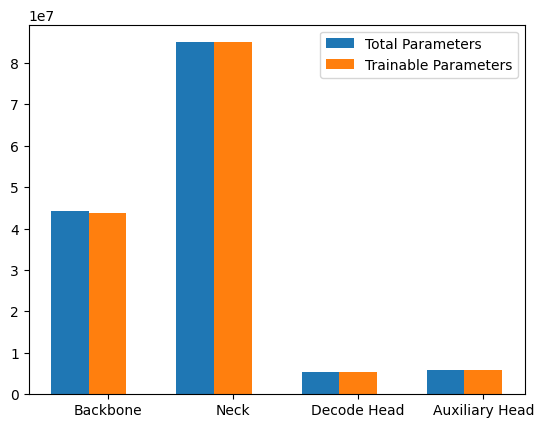

Total Parameters: 140,330,266
Total Trainable Parameters: 139,877,914
Total Parameters (No Backbone): 96,167,962
Total Trainable Parameters (No Backbone): 96,167,962


In [20]:
# model param info
backbone = model.backbone
neck = model.neck
decode_head = model.decode_head
auxiliary_head = model.auxiliary_head

def count_parameters(model_part):
    total_params = sum(p.numel() for p in model_part.parameters())
    trainable_params = sum(p.numel() for p in model_part.parameters() if p.requires_grad)
    return total_params, trainable_params

backbone_params, backbone_trainable = count_parameters(backbone)
neck_params, neck_trainable = count_parameters(neck)
decode_head_params, decode_head_trainable = count_parameters(decode_head)
auxiliary_head_params, auxiliary_head_trainable = count_parameters(auxiliary_head)

print(f"Backbone Total/Trainable Parameters: {backbone_params:,}/{backbone_trainable:,}")
print(f"Neck Total/Trainable Parameters: {neck_params:,}/{neck_trainable:,}")
print(f"Decode Head Total/Trainable Parameters: {decode_head_params:,}/{decode_head_trainable:,}")
print(f"Auxiliary Head Total/Trainable Parameters: {auxiliary_head_params:,}/{auxiliary_head_trainable:,}")

# Plot the param in bar chart
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
barWidth = 0.3
r1 = np.arange(4)
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

ax.bar(r1, [backbone_params, neck_params, decode_head_params, auxiliary_head_params], width=barWidth, label='Total Parameters')
ax.bar(r2, [backbone_trainable, neck_trainable, decode_head_trainable, auxiliary_head_trainable], width=barWidth, label='Trainable Parameters')

ax.set_xticks([r + barWidth for r in range(4)])
ax.set_xticklabels(['Backbone', 'Neck', 'Decode Head', 'Auxiliary Head'])
ax.legend()
plt.show()

# sum an dprint total parameters, nicely formatted for human reading
total_params = backbone_params + neck_params + decode_head_params + auxiliary_head_params
total_trainable = backbone_trainable + neck_trainable + decode_head_trainable + auxiliary_head_trainable
print(f"Total Parameters: {total_params:,}")
print(f"Total Trainable Parameters: {total_trainable:,}")

# total params without backbone
total_params_no_backbone = neck_params + decode_head_params + auxiliary_head_params
total_trainable_no_backbone = neck_trainable + decode_head_trainable + auxiliary_head_trainable
print(f"Total Parameters (No Backbone): {total_params_no_backbone:,}")
print(f"Total Trainable Parameters (No Backbone): {total_trainable_no_backbone:,}")